In [14]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from termcolor import colored

In [32]:
#Configuraciones
plt.rcParams['image.cmap'] = 'bwr'
plt.rcParams['savefig.bbox'] = 'tight'
style.use('ggplot') or plt.style.use('ggplot')

# <font color = "Blue"> Datos </font>

El conjunto de datos es SaratogaHouses del paquete mosaicData de R. Contiene información sobre el precio de 1728 viviendas situadas en Saratoga County, New York, USA en el año 2006. Además del precio, incluye 15 variables adicionales:

- **price**: precio de la vivienda.
- **lotSize**: metros cuadrados de la vivienda.
- **age**: antigüedad de la vivienda.
- **landValue**: valor del terreno.
- **livingArea**: metros cuadrados habitables.
- **pctCollege**: porcentaje del vecindario con título universitario.
- **bedrooms**: número de dormitorios.
- **firplaces**: número de chimeneas.
- **bathrooms**: número de cuartos de baño (el valor 0.5 hace referencia a cuartos de baño sin ducha).
- **rooms**: número de habitaciones.
- **heating**: tipo de calefacción.
- **fuel**: tipo de alimentación de la calefacción (gas, electricidad o diesel).
- **sewer**: tipo de desagüe.
- **waterfront**: si la vivienda tiene vistas al lago.
- **newConstruction**: si la vivienda es de nueva construcción.
- **centralAir**: si la vivienda tiene aire acondicionado.

In [6]:
# Se importan los datos de una fuente externa
url = "https://raw.githubusercontent.com/JoaquinAmatRodrigo/Estadistica-machine-learning-python/master/data/SaratogaHouses.csv"
data = pd.read_csv(url)


# Se renombran las variables
data.columns = ["precio", "metros_totales", "antiguedad", "precio_terreno",
                 "metros_habitables", "universitarios", "dormitorios", 
                 "chimenea", "banyos", "habitaciones", "calefaccion",
                 "consumo_calefacion", "desague", "vistas_lago",
                 "nueva_construccion", "aire_acondicionado"]

data.head(1)

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,banyos,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No


### <font color="blue"> Objetivo </font>
Predecir el precio de alquiler

# <font color = blue> Análisis exploratorio</font>

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
precio                1728 non-null float64
metros_totales        1728 non-null float64
antiguedad            1728 non-null int64
precio_terreno        1728 non-null int64
metros_habitables     1728 non-null int64
universitarios        1728 non-null int64
dormitorios           1728 non-null int64
chimenea              1728 non-null int64
banyos                1728 non-null float64
habitaciones          1728 non-null int64
calefaccion           1728 non-null object
consumo_calefacion    1728 non-null object
desague               1728 non-null object
vistas_lago           1728 non-null object
nueva_construccion    1728 non-null object
aire_acondicionado    1728 non-null object
dtypes: float64(3), int64(7), object(6)
memory usage: 216.1+ KB


### <font color="blue"> Caracteristicas con tipo de dato incorrecto </font>
<font color = "red"> Nota:</font>
- Concidero que las variables que hacen referencia al dinero y metros deberian ser variables continuas
- La variable baño es de naturaleza discreta

In [11]:
data['precio'] = data['precio'].astype('float64')
data['precio_terreno'] = data['precio_terreno'].astype('float64')
data['metros_habitables'] = data['metros_habitables'].astype('float64')
data['banyos'] = data['banyos'].astype('int64')

### <font color="blue"> Valores faltantes </font>

In [16]:
print(colored('No hay valores nulos', attrs = ['bold']))
data.isnull().sum()

No hay valores nulos


precio                0
metros_totales        0
antiguedad            0
precio_terreno        0
metros_habitables     0
universitarios        0
dormitorios           0
chimenea              0
banyos                0
habitaciones          0
calefaccion           0
consumo_calefacion    0
desague               0
vistas_lago           0
nueva_construccion    0
aire_acondicionado    0
dtype: int64

In [20]:
print(colored('Otro metodo (False: Valores no nulos), (True: Valores nulos)', attrs=['bold']))
available = data.isnull()
available = available.apply(pd.Series.value_counts)
available

Otro metodo (False: Valores no nulos), (True: Valores nulos)


,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,banyos,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
False,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728


### <font color = "blue">Variable respuesta</font>

**Rug plot** es un tipo de gráfica que muestra la distribución de una variable con marcas representando las observaciones individuales de una manera discreta en un único eje. 

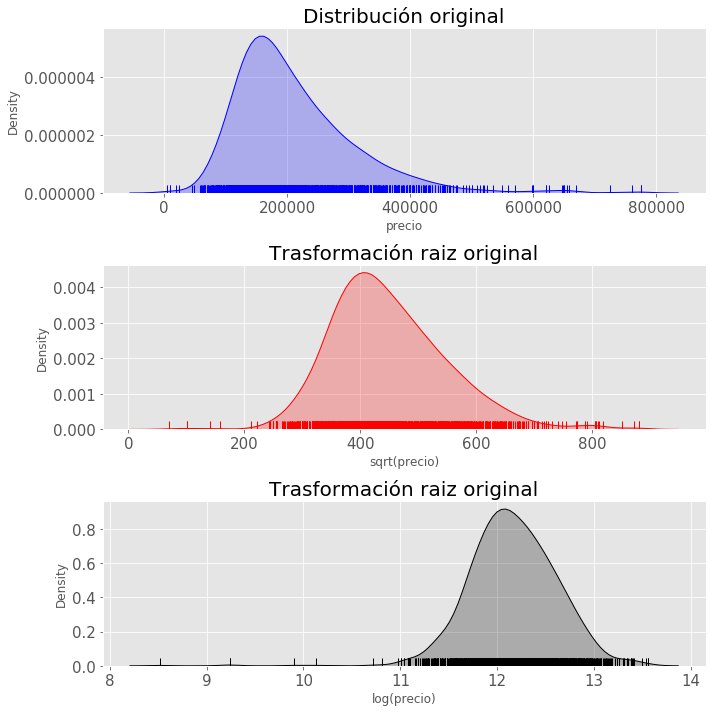

In [55]:
fig, ax = plt.subplots(nrows =3,ncols = 1, figsize = (10,10))

sns.distplot(data.precio, hist=False,rug=True,color = "blue",kde_kws = {'shade':True,'linewidth':1},ax=ax[0])
ax[0].set_title('Distribución original', size=20)
ax[0].tick_params(labelsize=15)
ax[0].set_xlabel('precio')
ax[0].set_ylabel('Density')

sns.distplot(np.sqrt(data.precio), hist=False, rug=True, color="red",kde_kws = {'shade':True,'linewidth':1},ax=ax[1])
ax[1].set_title('Trasformación raiz original', size=20)
ax[1].tick_params(labelsize=15)
ax[1].set_xlabel('sqrt(precio)')
ax[1].set_ylabel('Density')

sns.distplot(np.log(data.precio), hist=False, rug=True, color="black",kde_kws = {'shade':True,'linewidth':1},ax=ax[2])
ax[2].set_title('Trasformación raiz original', size=20)
ax[2].tick_params(labelsize=15)
ax[2].set_xlabel('log(precio)')
ax[2].set_ylabel('Density')

fig.tight_layout()